# Course Project - Option 1 START

# Task 1

In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id
spark = SparkSession.builder.appName('fifa').getOrCreate()

In [2]:
file_paths = []
for year in range(15, 23):
    file_path = f"players_{year}.csv"
    file_paths.append(file_path)

In [3]:
from pyspark.sql.functions import *
from functools import reduce
data_frames = []

for file_path in file_paths:
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    
    # Add a new column for the year.
    year = int(file_path.split("_")[1].split(".")[0]) + 2000
    df = df.withColumn('year', lit(year))
    
    # for test
    df.show(1, vertical = True)
    
    data_frames.append(df)

merged_df = reduce(lambda x, y: x.union(y), data_frames)

merged_df.show(5, vertical = True)

-RECORD 0-------------------------------------------
 sofifa_id                   | 158023               
 player_url                  | https://sofifa.co... 
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 player_positions            | CF                   
 overall                     | 93                   
 potential                   | 95                   
 value_eur                   | 1.005E8              
 wage_eur                    | 550000.0             
 age                         | 27                   
 dob                         | 1987-06-24 00:00:00  
 height_cm                   | 169                  
 weight_kg                   | 67                   
 club_team_id                | 241.0                
 club_name                   | FC Barcelona         
 league_name                 | Spain Primera Div... 
 league_level                | 1                    
 club_position               | CF             

-RECORD 0-------------------------------------------
 sofifa_id                   | 20801                
 player_url                  | https://sofifa.co... 
 short_name                  | Cristiano Ronaldo    
 long_name                   | Cristiano Ronaldo... 
 player_positions            | LW, LM, ST           
 overall                     | 94                   
 potential                   | 94                   
 value_eur                   | 8.7E7                
 wage_eur                    | 575000.0             
 age                         | 31                   
 dob                         | 1985-02-05 00:00:00  
 height_cm                   | 185                  
 weight_kg                   | 80                   
 club_team_id                | 243.0                
 club_name                   | Real Madrid CF       
 league_name                 | Spain Primera Div... 
 league_level                | 1                    
 club_position               | LW             

-RECORD 0-------------------------------------------
 sofifa_id                   | 20801                
 player_url                  | https://sofifa.co... 
 short_name                  | Cristiano Ronaldo    
 long_name                   | Cristiano Ronaldo... 
 player_positions            | ST, LW               
 overall                     | 94                   
 potential                   | 94                   
 value_eur                   | 7.7E7                
 wage_eur                    | 400000.0             
 age                         | 33                   
 dob                         | 1985-02-05 00:00:00  
 height_cm                   | 187                  
 weight_kg                   | 83                   
 club_team_id                | 45.0                 
 club_name                   | Juventus             
 league_name                 | Italian Serie A      
 league_level                | 1                    
 club_position               | ST             

-RECORD 0-------------------------------------------
 sofifa_id                   | 158023               
 player_url                  | https://sofifa.co... 
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 player_positions            | RW, ST, CF           
 overall                     | 93                   
 potential                   | 93                   
 value_eur                   | 1.035E8              
 wage_eur                    | 560000.0             
 age                         | 33                   
 dob                         | 1987-06-24 00:00:00  
 height_cm                   | 170                  
 weight_kg                   | 72                   
 club_team_id                | 241.0                
 club_name                   | FC Barcelona         
 league_name                 | Spain Primera Div... 
 league_level                | 1                    
 club_position               | CAM            

-RECORD 0-------------------------------------------
 sofifa_id                   | 158023               
 player_url                  | https://sofifa.co... 
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 player_positions            | CF                   
 overall                     | 93                   
 potential                   | 95                   
 value_eur                   | 1.005E8              
 wage_eur                    | 550000.0             
 age                         | 27                   
 dob                         | 1987-06-24 00:00:00  
 height_cm                   | 169                  
 weight_kg                   | 67                   
 club_team_id                | 241.0                
 club_name                   | FC Barcelona         
 league_name                 | Spain Primera Div... 
 league_level                | 1                    
 club_position               | CF             

In [4]:
merged_df.groupby("year").count().show()

+----+-----+
|year|count|
+----+-----+
|2015|16155|
|2016|15623|
|2017|17596|
|2018|17954|
|2019|18085|
|2020|18483|
|2021|18944|
|2022|19239|
+----+-----+



In [5]:
playersdf = merged_df.withColumn("unique_id", monotonically_increasing_id())
playersdf.show(5, vertical=True)

-RECORD 0-------------------------------------------
 sofifa_id                   | 158023               
 player_url                  | https://sofifa.co... 
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 player_positions            | CF                   
 overall                     | 93                   
 potential                   | 95                   
 value_eur                   | 1.005E8              
 wage_eur                    | 550000.0             
 age                         | 27                   
 dob                         | 1987-06-24 00:00:00  
 height_cm                   | 169                  
 weight_kg                   | 67                   
 club_team_id                | 241.0                
 club_name                   | FC Barcelona         
 league_name                 | Spain Primera Div... 
 league_level                | 1                    
 club_position               | CF             

In [6]:
playersdf.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable

In [7]:
# Ingest the data from all years (2015-2022) into one Postgres Database table
postgres_url = "jdbc:postgresql://localhost:5432/postgres"
properties = {
    "user": "postgres",
    "password": "V!gnesh5678",
    "driver": "org.postgresql.Driver"
}

table_name = "fifa.fifa_table" 

playersdf.write.jdbc(url=postgres_url, table=table_name, mode="overwrite", properties=properties)

# End of Task 1

# Task 2

In [8]:
from pyspark.sql.functions import col, when, count, avg, desc, dense_rank, rank, row_number
from pyspark.sql.window import Window

# Read data from PostgreSQL
jdbc_url = "jdbc:postgresql://localhost:5432/postgres"
db_properties = {"user": "postgres", "password": "V!gnesh5678", "driver": "org.postgresql.Driver"}
df_fifa = spark.read.jdbc(url=jdbc_url, table="fifa.fifa_table", properties=db_properties)

In [9]:
df_fifa.show(1, vertical = True)

-RECORD 0-------------------------------------------
 sofifa_id                   | 240272               
 player_url                  | https://sofifa.co... 
 short_name                  | Min Gyeong Min       
 long_name                   | 민경민 闵景民        
 player_positions            | CM                   
 overall                     | 51                   
 potential                   | 59                   
 value_eur                   | 50000.0              
 wage_eur                    | 1000.0               
 age                         | 22                   
 dob                         | 1996-06-04 00:00:00  
 height_cm                   | 183                  
 weight_kg                   | 65                   
 club_team_id                | 2056.0               
 club_name                   | Daegu FC             
 league_name                 | Korean K League 1    
 league_level                | 1                    
 club_position               | SUB                  

In [10]:
players22df =  df_fifa.filter(df_fifa['year']==2022)
players22_contract23df =  players22df.filter(players22df['club_contract_valid_until']==2023)
grouped_counts = players22_contract23df.groupby('club_name').count()
sorted_counts = grouped_counts.orderBy(desc('count'))

# X clubs that have the highest number of players with contracts ending in 2023 

In [11]:
X = 10  # Replace X with the desired number of top clubs you want to retrieve
top_X_clubs = sorted_counts.limit(X)

top_X_clubs.show()

+--------------------+-----+
|           club_name|count|
+--------------------+-----+
|En Avant de Guingamp|   19|
| Club Atlético Lanús|   17|
|       Lechia Gdańsk|   17|
|            Barnsley|   16|
|        Kasimpaşa SK|   16|
|        Bengaluru FC|   16|
|        FC Barcelona|   15|
|  SV Wehen Wiesbaden|   15|
|          CA Osasuna|   15|
|      Zagłębie Lubin|   15|
+--------------------+-----+



# Y clubs with highest average number of players >27 years of age

In [12]:
players_above_27 = df_fifa.filter(col('age') > 27)
players_above_27 = players_above_27.filter(col("club_name").isNotNull())

window_spec = Window.partitionBy('club_name')

club_avg_players = players_above_27.groupBy('club_name', 'year') \
    .agg(count('*').alias('player_count'), first('club_name').over(window_spec).alias('club_name_first')) \
    .groupBy('club_name_first') \
    .agg(avg(col('player_count')).alias('avg_players_count'))

# Calculate rank for each club based on the average number of players
club_avg_players_ranked = club_avg_players.withColumn('rank', rank().over(Window.orderBy(col('avg_players_count').desc())))

# Filter the clubs that share the same rank as the Yth club
Y = 10  # Replace with the desired number of clubs
result = club_avg_players_ranked.filter(col('rank') <= Y)

result.show()

+--------------------+-----------------+----+
|     club_name_first|avg_players_count|rank|
+--------------------+-----------------+----+
|  Dorados de Sinaloa|             19.0|   1|
| Matsumoto Yamaga FC|             19.0|   1|
| Shanghai Shenhua FC|             18.5|   3|
|          Qingdao FC|             18.0|   4|
|Club Deportivo Jo...|             17.5|   5|
|            Altay SK|             17.0|   6|
|         Guaireña FC|             17.0|   6|
|İstanbul Başakşeh...|           16.625|   8|
|      BB Erzurumspor|             16.5|   9|
|        Club Olimpia|             16.5|   9|
|      Sport Huancayo|             16.5|   9|
+--------------------+-----------------+----+



# Most frequent Nation Position for each year in dataset

In [13]:
# Group by 'year' and 'nation_position', count occurrences, and find the most frequent position for each year
most_frequent_nation_positions = df_fifa.groupBy('year', 'nation_position') \
    .agg(count("*").alias("count")) \
    .withColumn("rank", row_number().over(Window.partitionBy("year").orderBy(desc("count")))) \
    .filter(col("rank") == 3) \
    .select("year", "nation_position")

most_frequent_nation_positions.show()

+----+---------------+
|year|nation_position|
+----+---------------+
|2015|            LCB|
|2016|            RCB|
|2017|             GK|
|2018|            LCB|
|2019|             GK|
|2020|            RCB|
|2021|            LCB|
|2022|            LCB|
+----+---------------+



# End of Task 2

# Task 3

In [14]:
from pyspark.ml import Pipeline,Transformer
from pyspark.ml.feature import Imputer,StandardScaler,StringIndexer,OneHotEncoder, VectorAssembler

from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np

In [15]:
col_names = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions',
 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name',
 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 
 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot',
 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur',
 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw',
 'lf', 'cf', 'rf', 'rw','lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb',
 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url',
 'year', 'Unique_ID']

continuous_cols = ['value_eur', 'wage_eur', 'age', 'dob','height_cm','weight_kg','club_team_id','league_level','club_jersey_number',
     'club_contract_valid_until','nationality_id','nation_team_id','nation_jersey_number','weak_foot','skill_moves',
     'international_reputation','pace','shooting','passing','dribbling','defending','physic','attacking_crossing',
     'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
     'skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
     'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power',
     'power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
     'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
     'defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving',
     'goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed',
     'year','Unique_ID']

columns_to_drop = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions',
 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name',
 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 
 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot',
 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur',
 'player_tags', 'player_traits','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw','lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url', 
 'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'year']

# Drop all columns that are not numeric or do not contribute the the "overall" of the player.
df_fifa_dropped = df_fifa.drop(*columns_to_drop)

In [16]:
null_counts = df_fifa_dropped.select([count(when(col(c).isNull(), c)).alias(c) for c in df_fifa_dropped.columns])

# Show the null counts for each column
null_counts.show(vertical = True)

-RECORD 0-----------------------------
 overall                     | 0      
 pace                        | 15791  
 shooting                    | 15791  
 passing                     | 15791  
 dribbling                   | 15791  
 defending                   | 15791  
 physic                      | 15791  
 attacking_crossing          | 0      
 attacking_finishing         | 0      
 attacking_heading_accuracy  | 0      
 attacking_short_passing     | 0      
 attacking_volleys           | 0      
 skill_dribbling             | 0      
 skill_curve                 | 0      
 skill_fk_accuracy           | 0      
 skill_long_passing          | 0      
 skill_ball_control          | 0      
 movement_acceleration       | 0      
 movement_sprint_speed       | 0      
 movement_agility            | 0      
 movement_reactions          | 0      
 movement_balance            | 0      
 power_shot_power            | 0      
 power_jumping               | 0      
 power_stamina           

In [17]:
# Drop menatility_composure and goalkeeping_speed columns due to large number of null counts, likely because they were only
# introduces as stats in later versions of the FIFA game.
columns_to_drop = ['mentality_composure', 'goalkeeping_speed']
df_fifa_dropped = df_fifa_dropped.drop(*columns_to_drop)

# Impute these columns, as they most likely relate to GoalKeepers who don't possess these stats.
columns_to_impute = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Impute null values with 0 in the specified columns
df_fifa_clean = df_fifa_dropped.fillna(0, subset=columns_to_impute)

null_counts = df_fifa_clean.select([count(when(isnan(c)|col(c).isNull(), c)).alias(c) for c in df_fifa_clean.columns])

# Show the null counts for each column
null_counts.show(vertical = True)

-RECORD 0--------------------------
 overall                     | 0   
 pace                        | 0   
 shooting                    | 0   
 passing                     | 0   
 dribbling                   | 0   
 defending                   | 0   
 physic                      | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power            | 0   
 power_jumping               | 0   
 power_stamina               | 0   
 power_strength              | 0   
 power_long_shots           

In [18]:
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark.sql import SparkSession, SQLContext
from pyspark.ml import Pipeline,Transformer
from pyspark.ml.feature import Imputer,StandardScaler,StringIndexer,OneHotEncoder, VectorAssembler

from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np

col_names = [
 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness',
 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'Unique_ID']

cols_to_drop = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness',
 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'Unique_ID']


class OutcomeCreater(Transformer):
    def __init__(self):
        super().__init__()

    def _transform(self, dataset):
        # Use the col() function to create a Column object
        output_df = dataset.withColumn('outcome', col('overall')).drop("overall")
        output_df = output_df.withColumn('outcome', col('outcome').cast(DoubleType()))
        return output_df

class FeatureTypeCaster(Transformer):
    def __init__(self):
        super().__init__()

    def _transform(self, dataset):
        output_df = dataset
        for col_name in cols_to_drop:
            output_df = output_df.withColumn(col_name,col(col_name).cast(DoubleType()))

        return output_df
class ColumnDropper(Transformer): # this transformer drops unnecessary columns
    def __init__(self, columns_to_drop = None):
        super().__init__()
        self.columns_to_drop=columns_to_drop
    def _transform(self, dataset):
        output_df = dataset
        for col_name in self.columns_to_drop:
            output_df = output_df.drop(col_name)
        return output_df 

def get_preprocess_pipeline():
    stage_typecaster = FeatureTypeCaster()
    
    feature_cols = cols_to_drop
    # Maybe we want to drop highly correlated features? 

    stage_vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="vectorized_features")

    stage_scaler = StandardScaler(inputCol="vectorized_features", outputCol="features")

    stage_outcome = OutcomeCreater()
    
    stage_column_dropper = ColumnDropper(columns_to_drop = cols_to_drop + ['vectorized_features'])

    #pipeline = Pipeline(stages=[stage_outcome, stage_typecaster, stage_vector_assembler, stage_scaler, stage_column_dropper])
    pipeline = Pipeline(stages = [stage_typecaster,stage_vector_assembler,stage_scaler,stage_outcome,stage_column_dropper])
    return pipeline

In [19]:
preprocess_pipeline = get_preprocess_pipeline()
preprocess_pipeline_model = preprocess_pipeline.fit(df_fifa_clean)

fifadf = preprocess_pipeline_model.transform(df_fifa_clean)

In [20]:
fifadf.printSchema()
fifadf.show(1, vertical = True)

root
 |-- features: vector (nullable = true)
 |-- outcome: double (nullable = true)

-RECORD 0------------------------
 features | [2.77278744992359... 
 outcome  | 51.0                 
only showing top 1 row



In [22]:
training_data, test_data = fifadf.randomSplit([0.8, 0.2])

# Spark Version

# Model 1- Linear Regression

# Before parameter tuning

In [60]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

#training_data, test_data = fifadf.randomSplit([0.8, 0.2])

# Define the features column and the target column
features_col = "features"
target_col = "outcome"

# Create a Linear Regression model
lr = LinearRegression(featuresCol=features_col, labelCol=target_col)

# Fit the model to the training data
lr_model = lr.fit(training_data)
predictions = lr_model.transform(test_data)
predictions = predictions.withColumn("rounded_prediction", round(col("prediction")))


# Evaluate the model
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol="rounded_prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data before tuning = {:.2f}".format(rmse))

Root Mean Squared Error (RMSE) on test data before tuning = 2.78


In [61]:
print("Default Regularization Paramenter: ", lr.getRegParam())
print("Default Maximum Iteration Paramenter: ", lr.getMaxIter())

Default Regularization Paramenter:  0.0
Default Maximum Iteration Paramenter:  100


# After parameter Tuning

In [62]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

lr = LinearRegression(featuresCol = 'features', labelCol = 'outcome')

# Create ParamGrid for Cross Validation
lr_paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0, 0.01, 0.1, 1])
             .addGrid(lr.maxIter, [100, 500, 1000])
             .build())

evaluator = RegressionEvaluator(predictionCol='prediction', 
    labelCol='outcome', metricName='rmse')

lr_cv = CrossValidator(estimator=lr, estimatorParamMaps=lr_paramGrid, 
                    evaluator=evaluator, numFolds=5)
lr_cv_model = lr_cv.fit(training_data)
lr_cv_prediction_test = lr_cv_model.transform(test_data)

In [63]:
print("Root Mean Squared Error (RMSE) on test data after tuning = {:.2f}".format(evaluator.evaluate(lr_cv_prediction_test)))

# Access the best model obtained after cross-validation
best_lr_model = lr_cv_model.bestModel

# Access the best parameters from the best model
best_reg_param = best_lr_model.getRegParam()
best_max_iter = best_lr_model.getMaxIter()

print("Regularization Parameter after tuning: ", best_reg_param)
print("Maximum Iteration Parameter after tuning: ", best_max_iter)

Root Mean Squared Error (RMSE) on test data after tuning = 2.77
Regularization Parameter after tuning:  0.0
Maximum Iteration Parameter after tuning:  100


In [64]:
predictions = best_lr_model.transform(test_data)
predictions = predictions.withColumn("rounded_prediction", round(col("prediction")))
predictions.show(5)

+--------------------+-------+-----------------+------------------+
|            features|outcome|       prediction|rounded_prediction|
+--------------------+-------+-----------------+------------------+
|[0.0,0.0,0.0,0.0,...|   71.0|66.28407303483388|              66.0|
|[0.0,0.0,0.0,0.0,...|   71.0|67.23984093782397|              67.0|
|[0.0,0.0,0.0,0.0,...|   58.0|56.69213462445589|              57.0|
|[0.0,0.0,0.0,0.0,...|   54.0|54.71469278475102|              55.0|
|[0.0,0.0,0.0,0.0,...|   62.0|63.65400039164052|              64.0|
+--------------------+-------+-----------------+------------------+
only showing top 5 rows



Exception ignored in: <function JavaWrapper.__del__ at 0x000001E375461040>
Traceback (most recent call last):
  File "C:\SPARK\spark-3.3.3-bin-hadoop3\python\pyspark\ml\wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'RegressionEvaluator' object has no attribute '_java_obj'


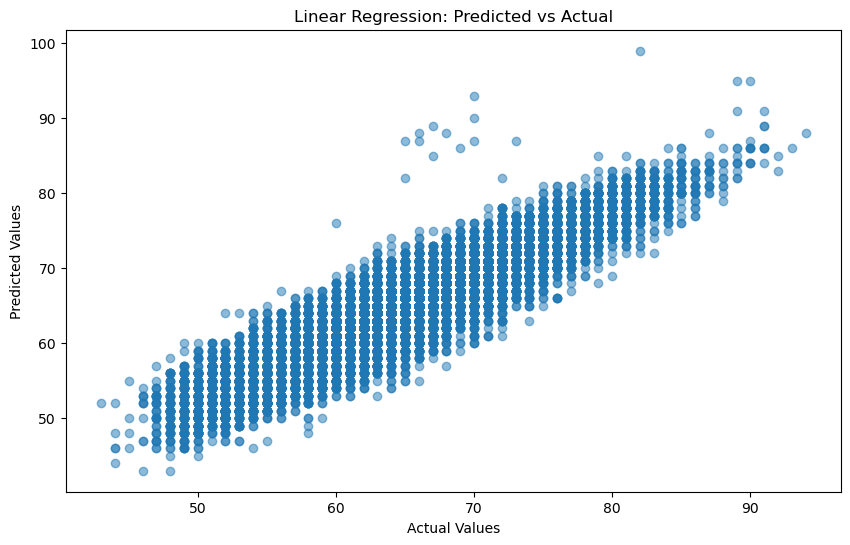

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter( predictions.select('outcome').collect(), predictions.select('rounded_prediction').collect(), alpha=0.5)
plt.title('Linear Regression: Predicted vs Actual')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Model 2 - Gradient Boosted Tree Regression

# Before Parameter Tuning

In [66]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol=features_col, labelCol=target_col)
gbt_model = gbt.fit(training_data)
predictions_gbt = gbt_model.transform(test_data)
predictions_gbt = predictions_gbt.withColumn("rounded_prediction", round(col("prediction")))

evaluator_gbt = RegressionEvaluator(labelCol=target_col, predictionCol="rounded_prediction", metricName="rmse")
rmse_gbt = evaluator_gbt.evaluate(predictions_gbt)
print("GBT RMSE on test data before tuning = {:.2f}".format(rmse_gbt))

GBT RMSE on test data before tuning = 1.92


In [75]:
print("Default Step Size/Learning Rate Parameter: ", gbt.getStepSize())
print("Default Maximum Depth Paramenter: ", gbt.getMaxDepth())

Default Step Size/Learning Rate Parameter:  0.1
Default Maximum Depth Paramenter:  5


# After Parameter Tuning

In [73]:
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'outcome')

# Create ParamGrid for Cross Validation
gbt_paramGrid = (ParamGridBuilder()
             .addGrid(gbt.stepSize, [0.001, 0.01, 0.1, 0.5])
             .addGrid(gbt.maxDepth, [2, 5, 10])
             .build())

evaluator = RegressionEvaluator(predictionCol='prediction', 
    labelCol='outcome', metricName='rmse')

gbt_cv = CrossValidator(estimator=gbt, estimatorParamMaps=gbt_paramGrid, 
                    evaluator=evaluator, numFolds=5)
gbt_cv_model = gbt_cv.fit(training_data)
gbt_cv_prediction_test = gbt_cv_model.transform(test_data)

In [74]:
print("Root Mean Squared Error (RMSE) on test data after tuning = {:.2f}".format(evaluator.evaluate(gbt_cv_prediction_test)))

# Access the best model obtained after cross-validation
best_gbt_model = gbt_cv_model.bestModel

# Access the best parameters from the best model
best_step_size = best_gbt_model.getStepSize()
best_max_depth = best_gbt_model.getMaxDepth()

print("Step Size/Learning Rate Parameter after tuning: ", best_step_size)
print("Maximum Depth Parameter after tuning: ", best_max_depth)

Root Mean Squared Error (RMSE) on test data after tuning = 1.38
Step Size/Learning Rate Parameter after tuning:  0.1
Maximum Depth Parameter after tuning:  10


In [76]:
predictions = best_gbt_model.transform(test_data)
predictions = predictions.withColumn("rounded_prediction", round(col("prediction")))
predictions.show(5)

+--------------------+-------+------------------+------------------+
|            features|outcome|        prediction|rounded_prediction|
+--------------------+-------+------------------+------------------+
|[0.0,0.0,0.0,0.0,...|   71.0| 70.97842965832238|              71.0|
|[0.0,0.0,0.0,0.0,...|   71.0| 70.89948892684117|              71.0|
|[0.0,0.0,0.0,0.0,...|   58.0|58.594642479603195|              59.0|
|[0.0,0.0,0.0,0.0,...|   54.0|53.294127839251665|              53.0|
|[0.0,0.0,0.0,0.0,...|   62.0| 62.45802718186232|              62.0|
+--------------------+-------+------------------+------------------+
only showing top 5 rows



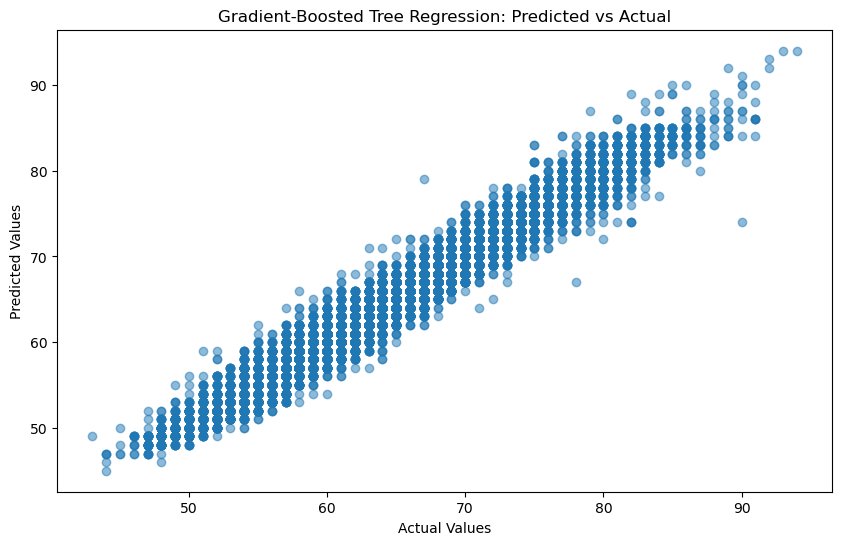

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(predictions.select('outcome').collect(), predictions.select('rounded_prediction').collect(), alpha=0.5)
plt.title('Gradient-Boosted Tree Regression: Predicted vs Actual')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# PyTorch Version

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch  # now import the pytorch module
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt

validation_data, test_data = test_data.randomSplit([0.5, 0.5])

dffifa_pandas = training_data.toPandas()
dffifa_validation_pandas = validation_data.toPandas()
dfffifa_test_pandas = test_data.toPandas()

x_train = torch.from_numpy(np.array(dffifa_pandas['features'].values.tolist(),np.float32))
y_train = torch.from_numpy(np.array(dffifa_pandas['outcome'].values.tolist(), np.float32))
x_val = torch.from_numpy(np.array(dffifa_validation_pandas['features'].values.tolist(),np.float32))
y_val = torch.from_numpy(np.array(dffifa_validation_pandas['outcome'].values.tolist(), np.float32))
x_test = torch.from_numpy(np.array(dfffifa_test_pandas['features'].values.tolist(),np.float32))
y_test = torch.from_numpy(np.array(dfffifa_test_pandas['outcome'].values.tolist(), np.float32))

In [24]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])

In [25]:
train_dataset = MyDataset(x_train, y_train)
validate_dataset = MyDataset(x_val, y_val)
test_dataset = MyDataset(x_test, y_test)

print("Train: ", len(train_dataset))
print("Test: ",len(test_dataset))
print("Validate: ",len(validate_dataset))

Train:  113555
Test:  14234
Validate:  14290


# Neural Network Model 1; 2 hidden layer width of 8

In [30]:
class Neural_Network(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,8),
            nn.ReLU(),
            nn.Linear(8,8),
            nn.ReLU(),
            nn.Linear(8,output_dim)
        )
    def forward(self,x):
        y = self.sequential(x)
        return y
mymodel = Neural_Network(x_train.shape[1],1)
print(mymodel)

Neural_Network(
  (sequential): Sequential(
    (0): Linear(in_features=40, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)


Epoch = 0, train_loss= 54.4366340637207, validation_loss= 8.51828670501709
Current epoch is best so far. Saving model...
Epoch = 1, train_loss= 8.41546630859375, validation_loss= 8.436905860900879
Current epoch is best so far. Saving model...
Epoch = 2, train_loss= 8.425558090209961, validation_loss= 9.009688377380371
Epoch = 3, train_loss= 8.406530380249023, validation_loss= 8.645577430725098
Epoch = 4, train_loss= 6.853942394256592, validation_loss= 4.5326828956604
Current epoch is best so far. Saving model...
Epoch = 5, train_loss= 3.936357259750366, validation_loss= 3.512838125228882
Current epoch is best so far. Saving model...
Epoch = 6, train_loss= 3.5165586471557617, validation_loss= 3.3321571350097656
Current epoch is best so far. Saving model...
Epoch = 7, train_loss= 3.430175304412842, validation_loss= 3.368833541870117
Epoch = 8, train_loss= 3.4011316299438477, validation_loss= 3.008687734603882
Current epoch is best so far. Saving model...
Epoch = 9, train_loss= 3.34331655

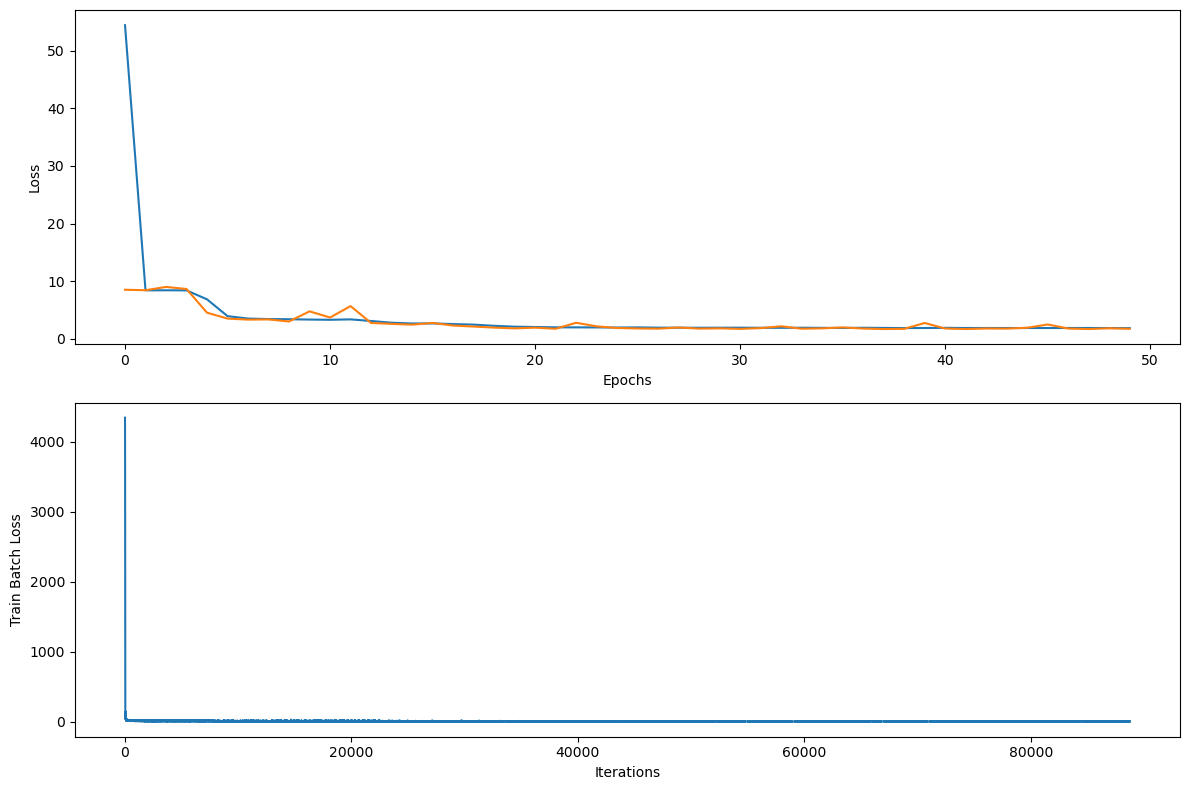

In [31]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


lr = 0.01
batch_size = 64
N_epochs = 50

loss_fun = nn.MSELoss()

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validation_dataloader = DataLoader(validate_dataset, batch_size = batch_size, shuffle = True)

optimizer = torch.optim.Adam(mymodel.parameters(), lr=lr)

train_losses = []
train_accuracies = []
validation_losses =[]
validation_accuracies =[]
train_batch_loss_overall = []

current_best_validation_loss = 100

for epoch in range(N_epochs):
    train_batch_loss = []
    for x_batch, y_batch in train_dataloader:
        mymodel.train()
        prediction_score = mymodel(x_batch).squeeze()
        loss = loss_fun(prediction_score, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_batch_loss.append(loss.detach().numpy())
        train_batch_loss_overall.append(loss.detach().numpy())
    
    validation_batch_loss = []
    for x_batch, y_batch in validation_dataloader:
        mymodel.eval()
        prediction_score = mymodel(x_batch).squeeze()
        loss = loss_fun(prediction_score, y_batch)
        validation_batch_loss.append(loss.detach())
        
    train_losses.append(np.mean(np.array(train_batch_loss)))
    validation_losses.append(np.mean(np.array(validation_batch_loss)))
    
    print(f"Epoch = {epoch}, train_loss= {train_losses[-1]}, validation_loss= {validation_losses[-1]}")
    
    if validation_losses[-1]<current_best_validation_loss:
        print("Current epoch is best so far. Saving model...")
        torch.save(mymodel.state_dict(), 'current_best_model')
        current_best_validation_loss = validation_losses[-1]
        
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
axes[0].plot(range(N_epochs), train_losses, label = 'Train Loss')
axes[0].plot(range(N_epochs), validation_losses, label = 'Validation Loss')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

axes[1].plot(range(len(train_batch_loss_overall)), train_batch_loss_overall, label = 'Train Loss per batch')
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Train Batch Loss")
plt.tight_layout()

In [32]:
bestmodel = Neural_Network(x_train.shape[1], 1)
bestmodel.load_state_dict(torch.load("current_best_model"))
prediction_score = bestmodel(x_test).squeeze()
        
squared_diff = (prediction_score - y_test)**2

# Step 2: Compute the mean of squared differences
mean_squared_diff = squared_diff.mean()

# Step 3: Take the square root to get RMSE
rmse = torch.sqrt(mean_squared_diff).detach().numpy()
print(f"Test RMSE = {rmse:.2f}")

Test RMSE = 1.30


# Neural Network Model 2; 6 hidden layers width of 16, 32, 64, 64, 32, 16 

In [46]:
class Neural_Network_Deep(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  # here we stack multiple layers together
            nn.Linear(input_dim,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,output_dim)
        )
    def forward(self,x):
        y = self.sequential(x)
        return y
mymodel = Neural_Network_Deep(x_train.shape[1],1)
print(mymodel)

Neural_Network_Deep(
  (sequential): Sequential(
    (0): Linear(in_features=40, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=16, bias=True)
    (11): ReLU()
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)


Epoch = 0, train_loss= 1.2301971912384033, validation_loss= 1.2082369327545166
Current epoch is best so far. Saving model...
Epoch = 1, train_loss= 1.1077075004577637, validation_loss= 0.9187121987342834
Current epoch is best so far. Saving model...
Epoch = 2, train_loss= 1.1203203201293945, validation_loss= 1.7944399118423462
Epoch = 3, train_loss= 1.1327956914901733, validation_loss= 0.9719799757003784
Epoch = 4, train_loss= 1.0990792512893677, validation_loss= 0.8731476664543152
Current epoch is best so far. Saving model...
Epoch = 5, train_loss= 1.1029692888259888, validation_loss= 0.8634973764419556
Current epoch is best so far. Saving model...
Epoch = 6, train_loss= 1.0848294496536255, validation_loss= 1.0105160474777222
Epoch = 7, train_loss= 1.0738279819488525, validation_loss= 1.381317138671875
Epoch = 8, train_loss= 1.0801481008529663, validation_loss= 0.9045010805130005
Epoch = 9, train_loss= 1.0964593887329102, validation_loss= 1.1686136722564697
Epoch = 10, train_loss= 1.0

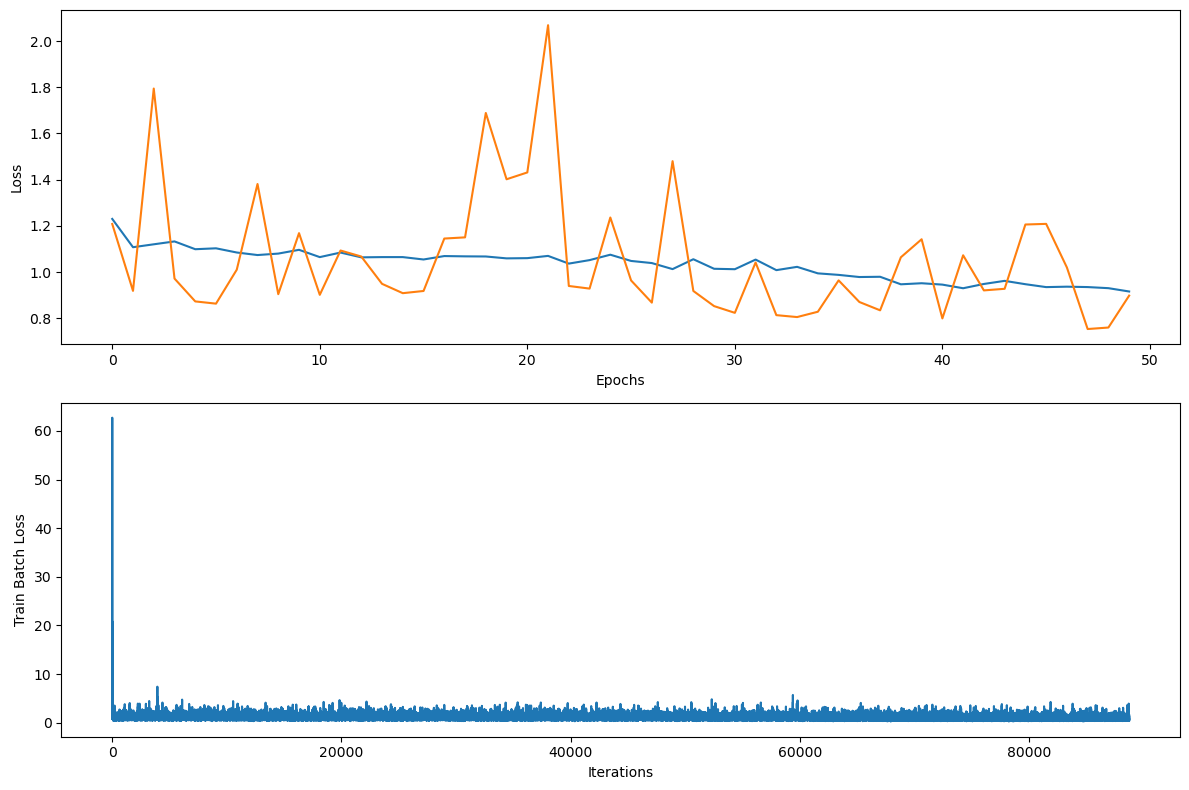

In [48]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


lr = 0.01
batch_size = 64
N_epochs = 50

loss_fun = nn.MSELoss()

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
validation_dataloader = DataLoader(validate_dataset, batch_size = batch_size, shuffle = True)

optimizer = torch.optim.Adam(mymodel.parameters(), lr=lr)

train_losses = []
train_accuracies = []
validation_losses =[]
validation_accuracies =[]
train_batch_loss_overall = []

current_best_validation_loss = 100

for epoch in range(N_epochs):
    train_batch_loss = []
    for x_batch, y_batch in train_dataloader:
        mymodel.train()
        prediction_score = mymodel(x_batch).squeeze()
        loss = loss_fun(prediction_score, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_batch_loss.append(loss.detach().numpy())
        train_batch_loss_overall.append(loss.detach().numpy())
    
    validation_batch_loss = []
    for x_batch, y_batch in validation_dataloader:
        mymodel.eval()
        prediction_score = mymodel(x_batch).squeeze()
        loss = loss_fun(prediction_score, y_batch)
        validation_batch_loss.append(loss.detach())
        
    train_losses.append(np.mean(np.array(train_batch_loss)))
    validation_losses.append(np.mean(np.array(validation_batch_loss)))
    
    print(f"Epoch = {epoch}, train_loss= {train_losses[-1]}, validation_loss= {validation_losses[-1]}")
    
    if validation_losses[-1]<current_best_validation_loss:
        print("Current epoch is best so far. Saving model...")
        torch.save(mymodel.state_dict(), 'current_best_model')
        current_best_validation_loss = validation_losses[-1]
        
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
axes[0].plot(range(N_epochs), train_losses, label = 'Train Loss')
axes[0].plot(range(N_epochs), validation_losses, label = 'Validation Loss')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

axes[1].plot(range(len(train_batch_loss_overall)), train_batch_loss_overall, label = 'Train Loss per Batch')
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Train Batch Loss")
plt.tight_layout()

In [53]:
bestmodel = Neural_Network_Deep(x_train.shape[1], 1)
bestmodel.load_state_dict(torch.load("current_best_model"))
prediction_score = bestmodel(x_test).squeeze()
        
squared_diff = (prediction_score - y_test)**2

# Step 2: Compute the mean of squared differences
mean_squared_diff = squared_diff.mean()

# Step 3: Take the square root to get RMSE
rmse = torch.sqrt(mean_squared_diff).detach().numpy()
print(f"Test RMSE = {rmse:.2f}")

Test RMSE = 0.86


In [54]:
rounded_predicted_values = torch.round(prediction_score)

# Display column names
print("{:<15} {:<15}".format('True Value', 'Predicted Value'))

# Display rows (only the first 5 rows)
for true_val, pred_val in zip(y_test[:5], rounded_predicted_values[:5]):
    print("{:<15} {:<15}".format(true_val.item(), pred_val.item()))

True Value      Predicted Value
54.0            54.0           
68.0            68.0           
73.0            72.0           
67.0            67.0           
74.0            74.0           
